In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [24]:
df = pd.read_csv('Job-Eligibility.csv')

In [25]:
df.head()

,EducationalQualification,ExpOver5Years,Technical,Gender,MaritalStatus,Eligibility
0,pg,yes,good,Female,Married,yes
1,pg,yes,good,Male,Single,yes
2,ug,no,good,Female,Married,No
3,pg,no,bad,Female,Single,No
4,pg,no,good,Male,Married,No


In [26]:
X = df.drop('Eligibility', axis = 'columns')
y = df['Eligibility']

In [27]:
X.dtypes

EducationalQualification    object
ExpOver5Years               object
Technical                   object
Gender                      object
MaritalStatus               object
dtype: object

In [28]:
one_hot_encoder = OneHotEncoder()

In [29]:
classifier = DecisionTreeClassifier(random_state = 42, criterion = 'entropy')

In [30]:
categorical_features = [np.issubdtype(dtype, np.object) for dtype in X.dtypes]
categorical_features

[True, True, True, True, True]

In [31]:
preprocessor = ColumnTransformer(
                    transformers = [('onehot', one_hot_encoder, categorical_features)],
                    remainder = 'passthrough'
                )

In [32]:
pipeline = Pipeline([('preprocessing', preprocessor), ('classifier', classifier)])

In [33]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  [True, True, True, True,
                                                   True])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

In [34]:
pipeline.predict(X)

array(['yes', 'yes', 'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

In [35]:
one_hot_encoder.fit(X)
one_hot_encoder.get_feature_names(X.columns)

array(['EducationalQualification_pg', 'EducationalQualification_ug',
       'ExpOver5Years_no', 'ExpOver5Years_yes', 'Technical_bad',
       'Technical_good', 'Gender_Female', 'Gender_Male',
       'MaritalStatus_Male', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widow'], dtype=object)

In [36]:
np.unique(y)

array(['No', 'yes'], dtype=object)

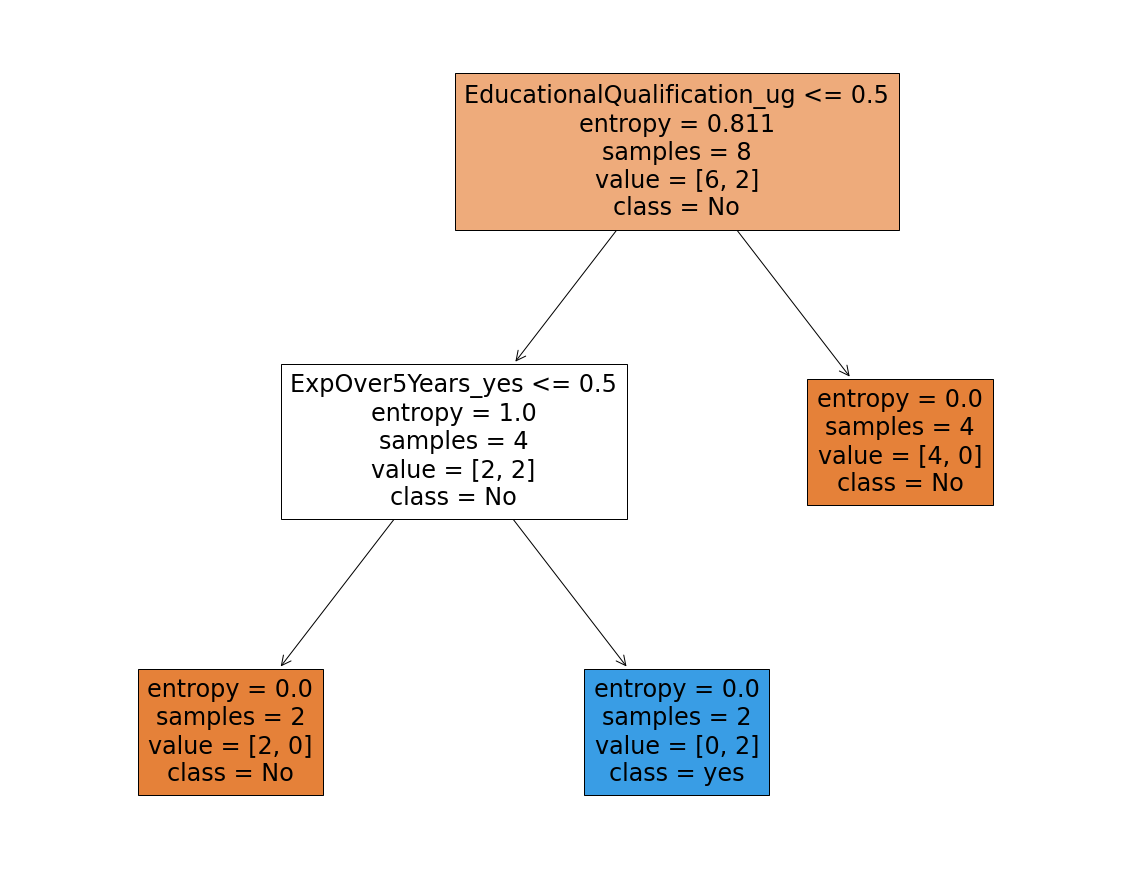

In [37]:
plt.figure(figsize=(20, 16))
plot_tree(classifier, filled = True, feature_names = one_hot_encoder.get_feature_names(X.columns), class_names = np.unique(y))
plt.show()

In [38]:
import pandas as pd

# Provided data
data = {
    'Color': ['W', 'G', 'G', 'Y', 'N', 'G', 'N', 'B', 'B', 'R', 'R', 'R', 'R', 'N', 'N', 'N', 'N', 'N'],
    'Wig': ['2', '2', '2', '2', '2', 'Y', '3', 'S', '2', '2', '2', 'S', 'S', 'S', 'H', 'H.', 'H', 'H'],
    'G': ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S'],
    'Num. Ears': ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'],
    'Emotion': ['W', 'Y', 'N', 'B', 'R', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV file
df.to_csv('Emotion.csv', index=False)


ValueError: arrays must all be same length